# Presentaion on Advanced Data Minining & Machine Learning
Presented to: **Tanvir Ahammad** <br>
Computer Science and Engineering. JnU <br><br>
Presented By:<br> **Kazi Muhammad Afsarul Hoque - M240105078 <br>
Md Arifur Rahman - M240105042** <br>

Weather Data from 1901 to 2023<br>
Data Source: Kaggle<br>
Source Link: https://www.kaggle.com/datasets/yakinrubaiat/bangladesh-weather-dataset<br>

**Brief introduction about data:** Dataset that combines temperature 🌡️ and rainfall 🌧️ data. The temperature data is sourced from NASA's POWER Project, and the rainfall data is obtained from the Humanitarian Data Exchange (HDX) website, specifically focusing on Bangladesh rainfall data.


# Data Preprocessing
 Data Upload

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving temp_and_rain_dataset.xlsx to temp_and_rain_dataset.xlsx


Loading Dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('temp_and_rain_dataset.xlsx')
print(df.head())

# print(df.shape)



   Temperature  Month  Year      Rain
0      16.9760      1  1901   18.5356
1      19.9026      2  1901   16.2548
2      24.3158      3  1901   70.7981
3      28.1834      4  1901   66.1616
4      27.8892      5  1901  267.2150
(1474, 4)


Check Dataset Information - Missing Value

In [ ]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1474 non-null   float64
 1   Month        1474 non-null   int64  
 2   Year         1474 non-null   int64  
 3   Rain         1474 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 46.2 KB
None
Temperature    0
Month          0
Year           0
Rain           0
dtype: int64


If value is missing

In [ ]:
# Fill missing values (if any)
# df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
# df['Rain'] = df['Rain'].fillna(df['Rain'].mean())


NameError: name 'df' is not defined

Convert Data Types

In [ ]:
# Check data types
print("Data Types:\n", df.dtypes)

# Convert columns to appropriate data types
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Temperature'] = df['Temperature'].astype(float)
df['Rain'] = df['Rain'].astype(float)


Data Types:
 Temperature    float64
Month            int64
Year             int64
Rain           float64
dtype: object


Define Seasons in Bangladesh

In [ ]:
# Define six seasons in Bangladesh based on months
def assign_bangladesh_season(month):
    if month in [4, 5]:
        return 'Summer'
    elif month in [6, 7]:
        return 'Monsoon'
    elif month in [8, 9]:
        return 'Autumn'
    elif month in [10, 11]:
        return 'Late Autumn'
    elif month in [12, 1]:
        return 'Winter'
    elif month in [2, 3]:
        return 'Spring'

# Add Season column to the dataset
df['Season'] = df['Month'].apply(assign_bangladesh_season)


print(df[['Month', 'Season']].drop_duplicates())


    Month       Season
0       1       Winter
1       2       Spring
2       3       Spring
3       4       Summer
4       5       Summer
5       6      Monsoon
6       7      Monsoon
7       8       Autumn
8       9       Autumn
9      10  Late Autumn
10     11  Late Autumn
11     12       Winter


Calculate Yearly and Seasonal Averages

Yearly Averages

In [ ]:
# Calculate yearly averages
yearly_averages = df.groupby('Year').agg({
    'Temperature': 'mean',
    'Rain': 'sum'
}).reset_index()

# Rename columns
yearly_averages.rename(columns={
    'Temperature': 'Avg_Temperature',
    'Rain': 'Total_Rain'
}, inplace=True)

# Merge yearly averages back to the dataset
df = pd.merge(df, yearly_averages, on='Year', how='left')

print(yearly_averages)


     Year  Avg_Temperature   Total_Rain
0    1901        24.819617  2432.819450
1    1902        24.672608  2345.714360
2    1903        24.823542  2257.387300
3    1904        24.628058  2450.069280
4    1905        24.205500  2806.313220
..    ...              ...          ...
118  2019        24.990994  2405.585882
119  2020        24.755417  2494.172060
120  2021        24.956380  2263.906380
121  2022        24.925597  1987.632308
122  2023        26.166291  1973.152708

[123 rows x 3 columns]


Seasonal Averages

In [ ]:
# Calculate seasonal averages
seasonal_averages = df.groupby('Season').agg({
    'Temperature': 'mean',
    'Rain': 'mean'
}).reset_index()


seasonal_averages.rename(columns={
    'Temperature': 'Season_Avg_Temperature',
    'Rain': 'Season_Avg_Rain'
}, inplace=True)


print(seasonal_averages)


        Season  Season_Avg_Temperature  Season_Avg_Rain
0       Autumn               28.043963       373.131110
1  Late Autumn               24.894526       104.847624
2      Monsoon               28.087515       489.795975
3       Spring               22.762071        31.535707
4       Summer               27.829543       209.149470
5       Winter               18.754681         7.249596


Code for EDA <br>
Temperature Trends <br>
Plot Yearly Average Temperatures


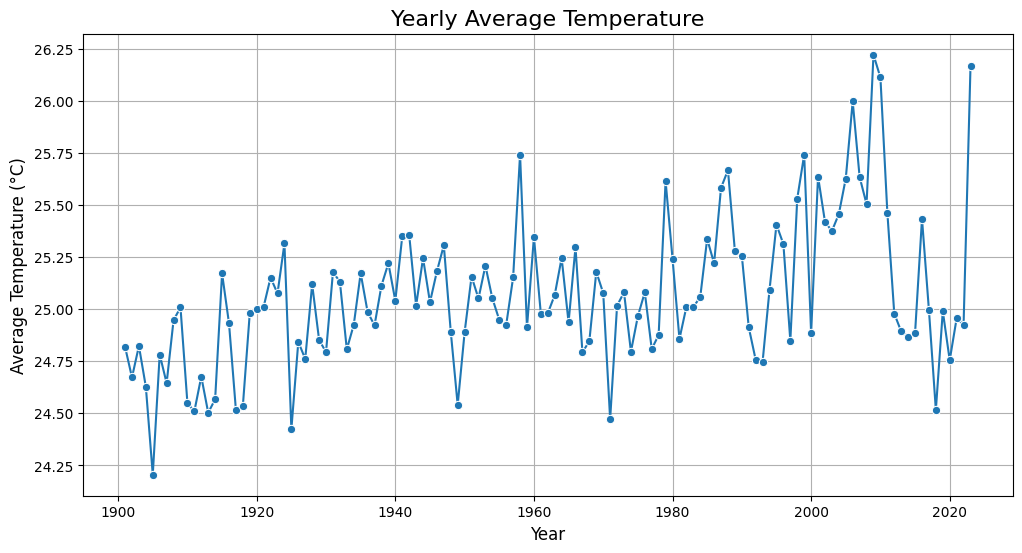

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot yearly average temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_averages, x='Year', y='Avg_Temperature', marker='o')
plt.title('Yearly Average Temperature', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid()
plt.show()


Boxplot for Monthly Temperature Variation

<ipython-input-29-0e8d1a7ae5ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Temperature', palette='coolwarm')


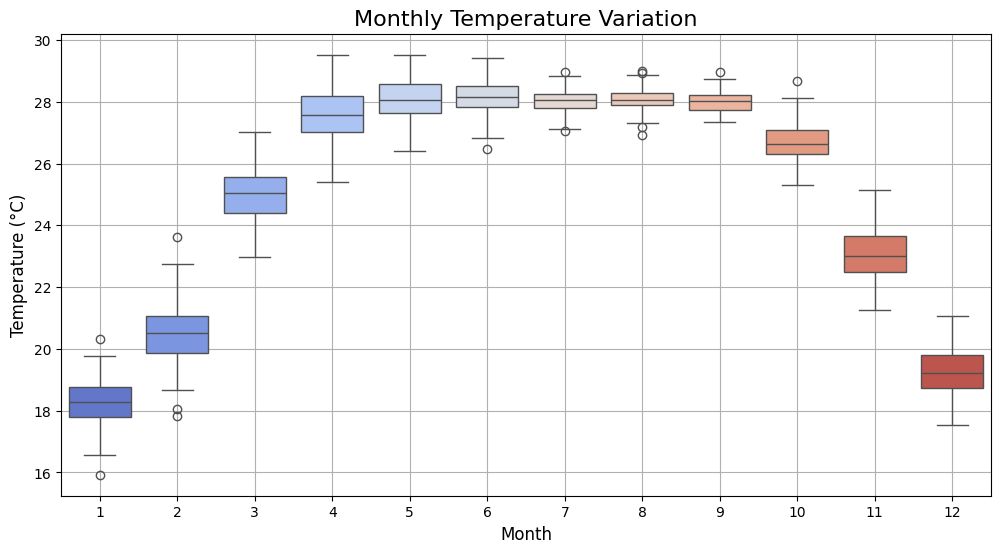

In [ ]:
# Boxplot for monthly temperature variation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Temperature', palette='coolwarm')
plt.title('Monthly Temperature Variation', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid()
plt.show()


Rainfall Trends <br>Plot Yearly Total Rainfall

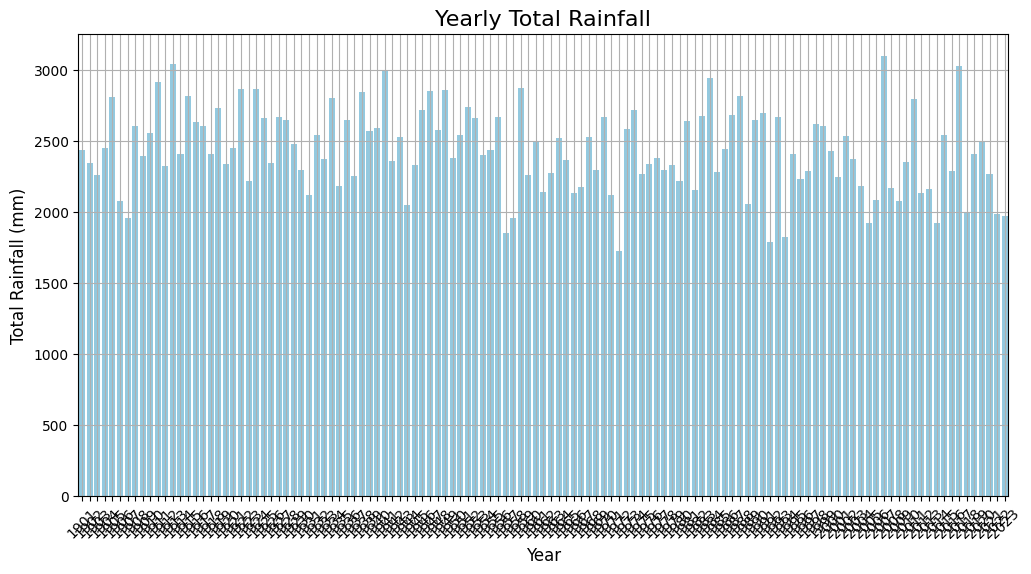

In [ ]:
# Plot yearly total rainfall
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_averages, x='Year', y='Total_Rain', color='skyblue')
plt.title('Yearly Total Rainfall', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()


Boxplot for Monthly Rainfall

<ipython-input-12-3de468530b2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Rain', palette='Blues')


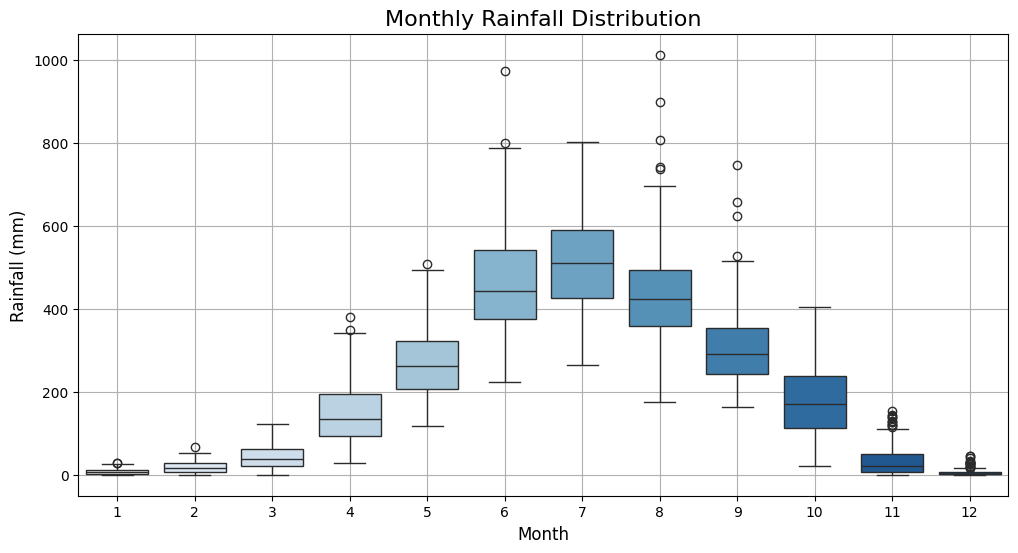

In [ ]:
# Boxplot for monthly rainfall
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Rain', palette='Blues')
plt.title('Monthly Rainfall Distribution', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.grid()
plt.show()


Seasonal Patterns <br>
Compare Average Rainfall and Temperature Across Seasons

<ipython-input-13-04d8bcfe1db9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_averages, x='Season', y='Season_Avg_Temperature', palette='coolwarm')
<ipython-input-13-04d8bcfe1db9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_averages, x='Season', y='Season_Avg_Rain', palette='Blues')


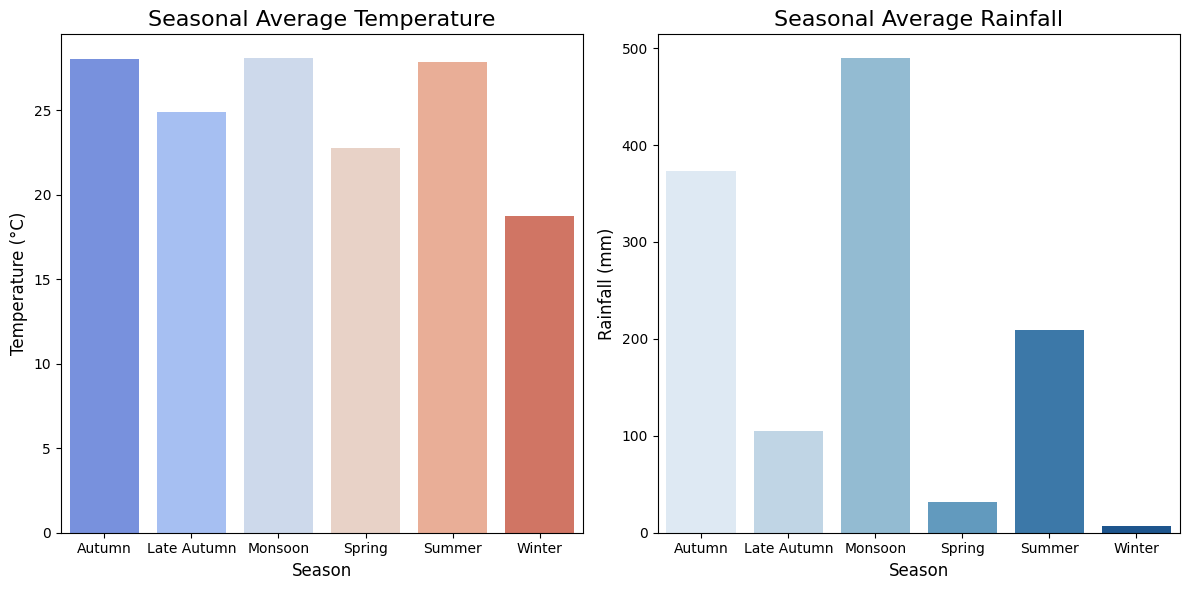

In [ ]:
# Plot seasonal average temperature and rainfall
plt.figure(figsize=(12, 6))

# Subplot 1: Seasonal average temperature
plt.subplot(1, 2, 1)
sns.barplot(data=seasonal_averages, x='Season', y='Season_Avg_Temperature', palette='coolwarm')
plt.title('Seasonal Average Temperature', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Subplot 2: Seasonal average rainfall
plt.subplot(1, 2, 2)
sns.barplot(data=seasonal_averages, x='Season', y='Season_Avg_Rain', palette='Blues')
plt.title('Seasonal Average Rainfall', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)

plt.tight_layout()
plt.show()


Predict Rainfall
Feature Selection and Data Preparation

In [ ]:
# Adding the Month column back from the original dataset
# Merge the monthly data with the yearly averages to add Month
yearly_averages_with_month = pd.merge(yearly_averages, df[['Year', 'Month']], on='Year', how='left')

# Check the columns again
print(yearly_averages_with_month.columns)

# Now you can proceed with the X_rainfall and y_rainfall as expected
X_rainfall = yearly_averages_with_month[['Avg_Temperature', 'Month', 'Year']]
y_rainfall = yearly_averages_with_month['Total_Rain']


Index(['Year', 'Avg_Temperature', 'Total_Rain', 'Cluster', 'DBSCAN_Cluster',
       'Month'],
      dtype='object')


K-Means Clustering

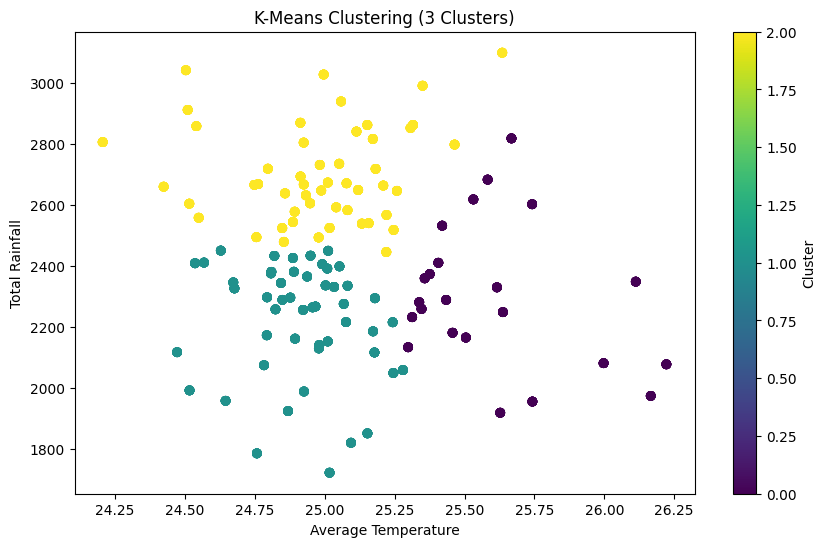

      Year  Avg_Temperature   Total_Rain  KMeans_Cluster
0     1901        24.819617  2432.819450               1
1     1901        24.819617  2432.819450               1
2     1901        24.819617  2432.819450               1
3     1901        24.819617  2432.819450               1
4     1901        24.819617  2432.819450               1
...    ...              ...          ...             ...
1469  2023        26.166291  1973.152708               0
1470  2023        26.166291  1973.152708               0
1471  2023        26.166291  1973.152708               0
1472  2023        26.166291  1973.152708               0
1473  2023        26.166291  1973.152708               0

[1474 rows x 4 columns]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the data for clustering
X_clustering = yearly_averages_with_month[['Avg_Temperature', 'Total_Rain']]

# Scaling the features (important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Apply K-Means clustering with 3 clusters (adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
yearly_averages_with_month['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(yearly_averages_with_month['Avg_Temperature'], yearly_averages_with_month['Total_Rain'], c=yearly_averages_with_month['KMeans_Cluster'], cmap='viridis')
plt.xlabel('Average Temperature')
plt.ylabel('Total Rainfall')
plt.title('K-Means Clustering (3 Clusters)')
plt.colorbar(label='Cluster')
plt.show()

# Show the resulting clusters
print(yearly_averages_with_month[['Year', 'Avg_Temperature', 'Total_Rain', 'KMeans_Cluster']])


Hierarchical Clustering

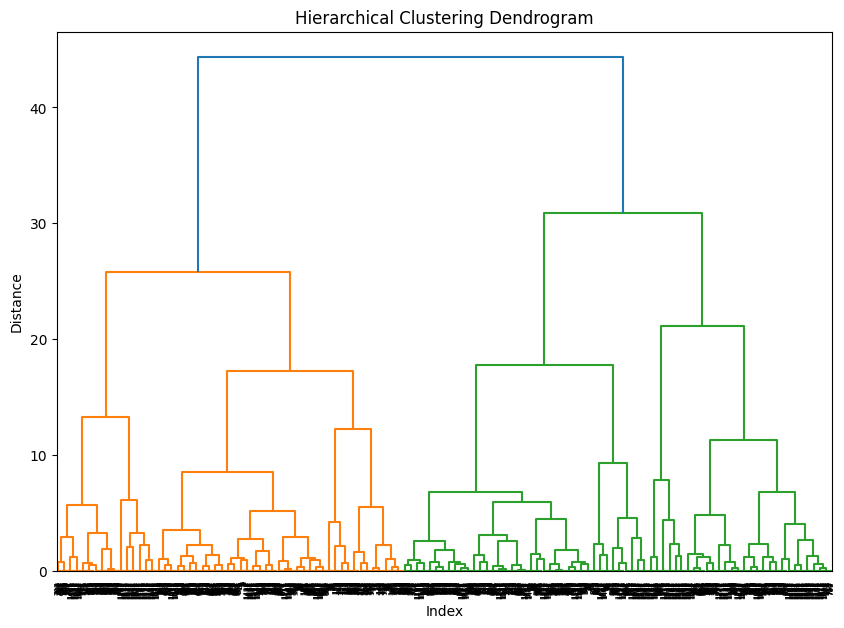

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
linked = linkage(X_scaled, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


DBSCAN (Density-Based Spatial Clustering)

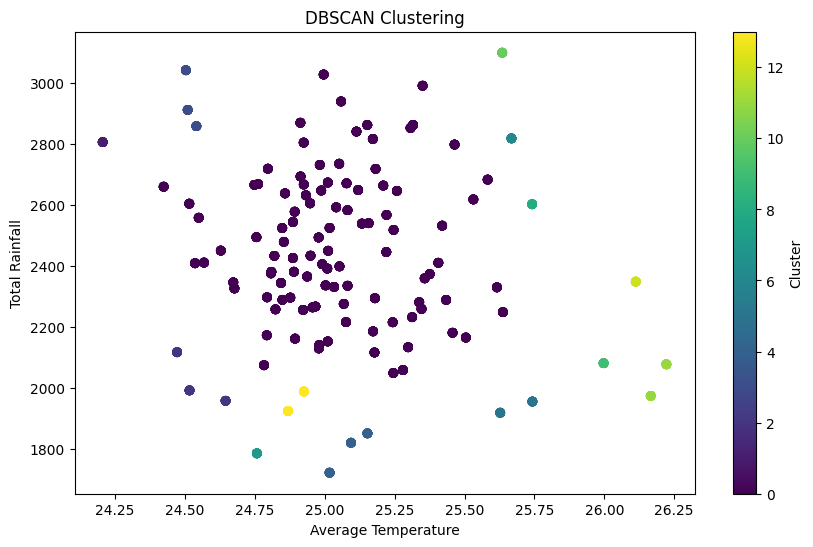

      Year  Avg_Temperature   Total_Rain  DBSCAN_Cluster
0     1901        24.819617  2432.819450               0
1     1901        24.819617  2432.819450               0
2     1901        24.819617  2432.819450               0
3     1901        24.819617  2432.819450               0
4     1901        24.819617  2432.819450               0
...    ...              ...          ...             ...
1469  2023        26.166291  1973.152708              11
1470  2023        26.166291  1973.152708              11
1471  2023        26.166291  1973.152708              11
1472  2023        26.166291  1973.152708              11
1473  2023        26.166291  1973.152708              11

[1474 rows x 4 columns]


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Adjust eps and min_samples as needed
yearly_averages_with_month['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Plot DBSCAN results
plt.figure(figsize=(10, 6))
plt.scatter(yearly_averages_with_month['Avg_Temperature'], yearly_averages_with_month['Total_Rain'], c=yearly_averages_with_month['DBSCAN_Cluster'], cmap='viridis')
plt.xlabel('Average Temperature')
plt.ylabel('Total Rainfall')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Show the resulting clusters
print(yearly_averages_with_month[['Year', 'Avg_Temperature', 'Total_Rain', 'DBSCAN_Cluster']])


Prediction Models (Rainfall or Temperature Prediction) <br>
Linear Reggretion

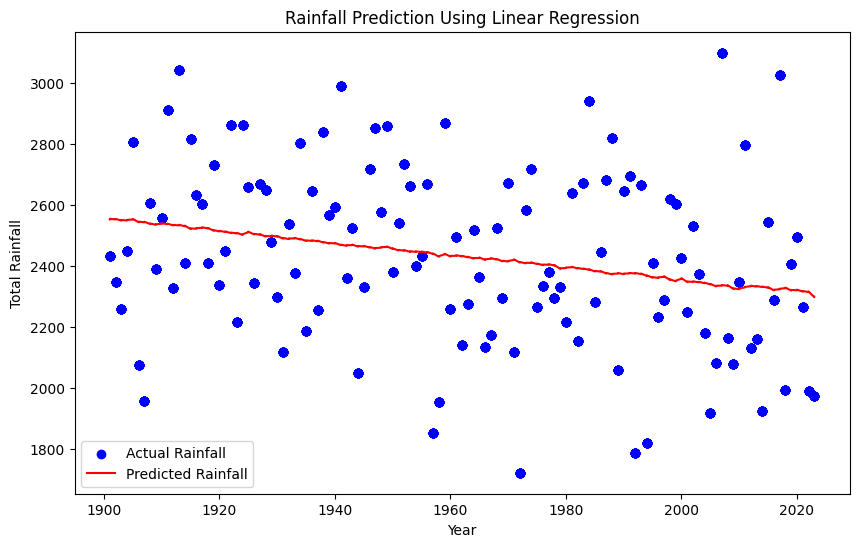

Intercept: 6575.741337026364
Coefficients: [-11.79784937   0.18538154  -1.9624104 ]


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare features and target
X_rainfall = yearly_averages_with_month[['Avg_Temperature', 'Month', 'Year']]
y_rainfall = yearly_averages_with_month['Total_Rain']

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_rainfall, y_rainfall)

# Predict rainfall for the same data
predicted_rain = model.predict(X_rainfall)

# Plot the predictions against actual values
plt.figure(figsize=(10, 6))
plt.scatter(yearly_averages_with_month['Year'], y_rainfall, color='blue', label='Actual Rainfall')
plt.plot(yearly_averages_with_month['Year'], predicted_rain, color='red', label='Predicted Rainfall')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.title('Rainfall Prediction Using Linear Regression')
plt.legend()
plt.show()

# Display model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


Predict Temperature and Rainfall for the Next 20 Years (LinearRegression Method)

    Year  Avg_Temperature  Predicted_Rainfall
0   2025        26.266291         2292.159920
1   2026        26.366291         2289.017725
2   2027        26.466291         2285.875530
3   2028        26.566291         2282.733334
4   2029        26.666291         2279.591139
5   2030        26.766291         2276.448944
6   2031        26.866291         2273.306748
7   2032        26.966291         2270.164553
8   2033        27.066291         2267.022358
9   2034        27.166291         2263.880162
10  2035        27.266291         2260.737967
11  2036        27.366291         2257.595772
12  2037        27.466291         2254.453576
13  2038        27.566291         2251.311381
14  2039        27.666291         2248.169186
15  2040        27.766291         2245.026990
16  2041        27.866291         2241.884795
17  2042        27.966291         2238.742600
18  2043        28.066291         2235.600404
19  2044        28.166291         2232.458209


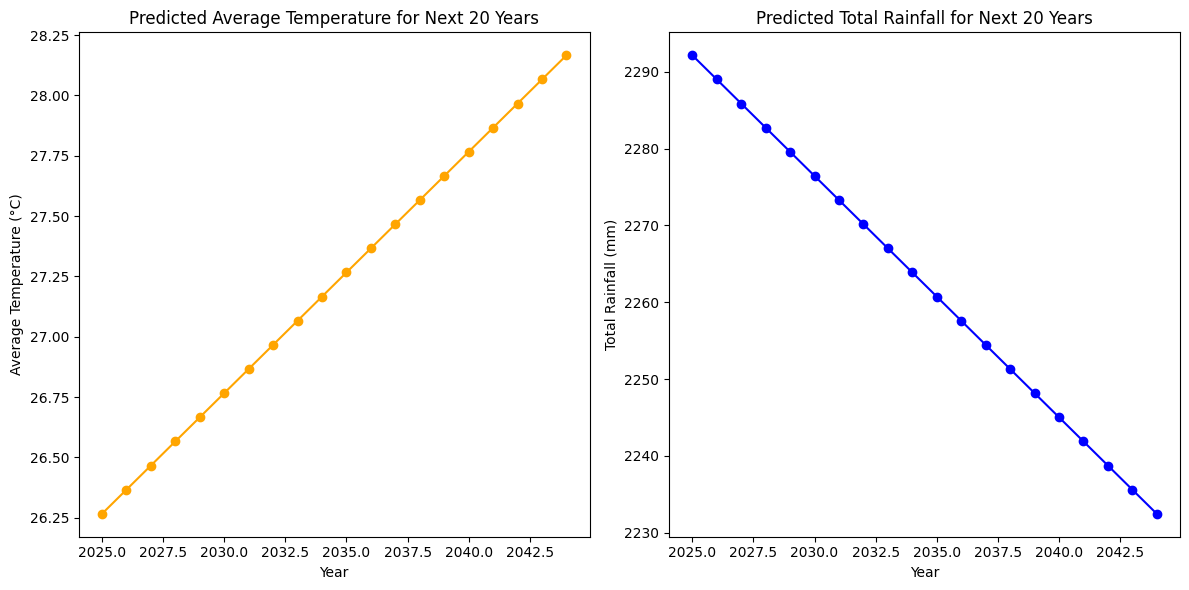

In [ ]:
import numpy as np

# Create a new dataset for the next 20 years
future_years = np.arange(2025, 2045)

# You can generate predicted temperatures assuming a small increment, for example:
# Take the average temperature from the latest year in the dataset and increase by a constant increment each year.
last_temp = yearly_averages_with_month['Avg_Temperature'].iloc[-1]  # Last recorded temperature
temp_increment = 0.1  # Assume the temperature increases by 0.1 degree every year

# Generate predicted temperatures for the next 20 years
predicted_temperatures = [last_temp + i * temp_increment for i in range(1, 21)]

# Assume the month will cycle through the 12 months (for simplicity, let's just use the month of January)
predicted_months = [1] * 20  # Assuming January for each year

# Prepare the data for prediction
future_data = pd.DataFrame({
    'Year': future_years,
    'Avg_Temperature': predicted_temperatures,
    'Month': predicted_months
})

# Use the trained regression model to predict rainfall for the next 20 years
predicted_rainfall = model.predict(future_data[['Avg_Temperature', 'Month', 'Year']])

# Combine the predicted data for temperature and rainfall
future_data['Predicted_Rainfall'] = predicted_rainfall

# Display the predicted data
print(future_data[['Year', 'Avg_Temperature', 'Predicted_Rainfall']])

# Plot the predictions
plt.figure(figsize=(12, 6))

# Plot Predicted Temperature
plt.subplot(1, 2, 1)
plt.plot(future_data['Year'], future_data['Avg_Temperature'], color='orange', marker='o')
plt.title('Predicted Average Temperature for Next 20 Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')

# Plot Predicted Rainfall
plt.subplot(1, 2, 2)
plt.plot(future_data['Year'], future_data['Predicted_Rainfall'], color='blue', marker='o')
plt.title('Predicted Total Rainfall for Next 20 Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')

plt.tight_layout()
plt.show()


# Extra

Evaluate the Model Performance (LinearRegression Method)

Sinusoidal Seasonal Variation:

Adds cyclic patterns using sin(2π * i / period) to simulate natural fluctuations (e.g., 5-year cycles).
Random Noise:

Adds randomness to predictions using np.random.normal(mean, std) for more realistic variability.
Reduced Trend:

Smaller, realistic upward or downward trends.

    Year  Avg_Temperature  Avg_Rainfall
0   2025        27.056306   2037.912982
1   2026        27.000171   1995.371999
2   2027        25.868623   1951.428489
3   2028        25.210424   1936.439290
4   2029        26.194029   1971.871371
5   2030        26.766063   1963.586382
6   2031        27.275143   1984.461719
7   2032        26.259690   1930.922866
8   2033        25.645286   1883.712449
9   2034        26.768791   1940.975082
10  2035        27.606395   1959.354654
11  2036        27.267718   1935.365827
12  2037        25.839920   1885.777988
13  2038        26.021932   1861.463106
14  2039        26.892967   1905.212907
15  2040        27.667225   1946.951519
16  2041        27.551224   1872.370553
17  2042        26.484192   1827.894305
18  2043        26.396522   1777.170533
19  2044        26.966103   1874.184970


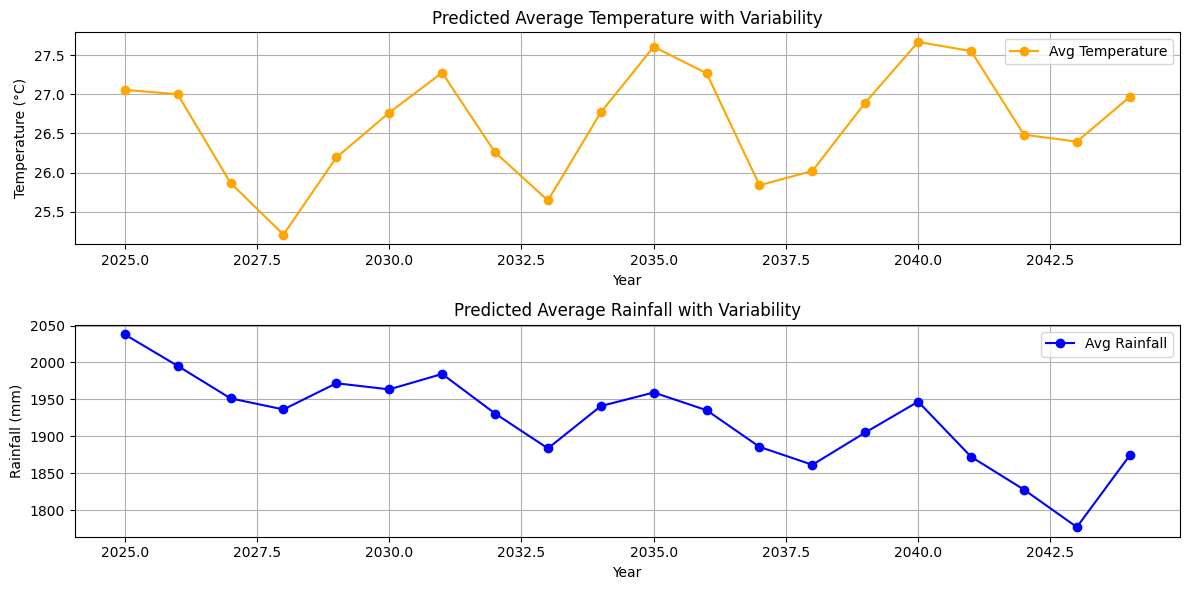

In [ ]:


# Predict for the next 20 years
future_years = np.arange(2025, 2045)

# Base values from the last recorded year
last_temp_avg = yearly_averages_with_month['Avg_Temperature'].iloc[-1]
last_rainfall_avg = yearly_averages_with_month['Total_Rain'].iloc[-1]

# Define trends (if any) and variations
temp_trend = 0.05  # Smaller upward trend for temperature
rainfall_trend = -5  # Assume slight decline in rainfall trend (or adjust as needed)
seasonal_amplitude_temp = 1  # Seasonal temperature variation
seasonal_amplitude_rain = 50  # Seasonal rainfall variation

# Generate predictions with sinusoidal seasonal variation and random noise
predicted_avg_temperatures = [
    last_temp_avg + i * temp_trend + seasonal_amplitude_temp * np.sin(2 * np.pi * i / 5) + np.random.normal(0, 0.2)
    for i in range(1, 21)
]

predicted_avg_rainfall = [
    last_rainfall_avg + i * rainfall_trend + seasonal_amplitude_rain * np.sin(2 * np.pi * i / 5) + np.random.normal(0, 20)
    for i in range(1, 21)
]

# Combine predictions into a DataFrame
future_predictions = pd.DataFrame({
    'Year': future_years,
    'Avg_Temperature': predicted_avg_temperatures,
    'Avg_Rainfall': predicted_avg_rainfall
})

# Display predictions
print(future_predictions)

# Visualization
plt.figure(figsize=(12, 6))

# Plot Predicted Temperature
plt.subplot(2, 1, 1)
plt.plot(future_predictions['Year'], future_predictions['Avg_Temperature'], label='Avg Temperature', color='orange', marker='o')
plt.title('Predicted Average Temperature with Variability')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()

# Plot Predicted Rainfall
plt.subplot(2, 1, 2)
plt.plot(future_predictions['Year'], future_predictions['Avg_Rainfall'], label='Avg Rainfall', color='blue', marker='o')
plt.title('Predicted Average Rainfall with Variability')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
